# **MLFA - MINI PROJECT 2**

Name - Bhosale Ratnesh Sambhajirao

Roll No - 19MF10010


## **1. Penalize the Magnitude of Coefficients**



### Importing Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Generate dataset

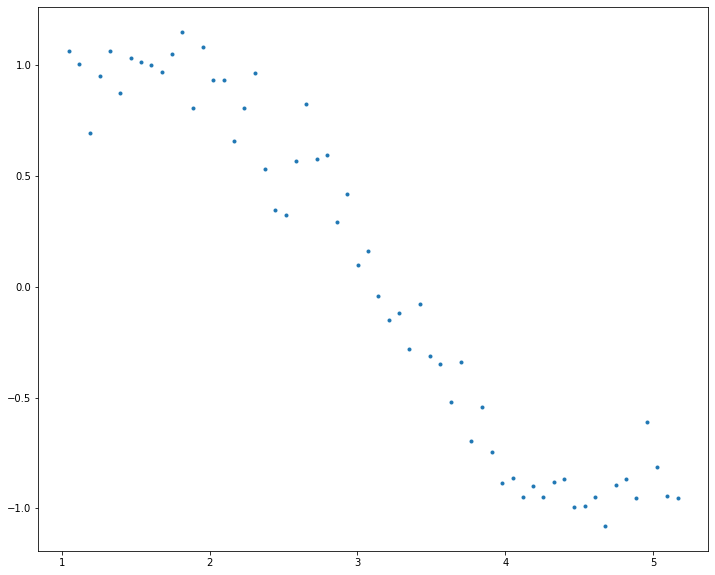

In [ ]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  
#Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

Looks similar to sine curve with some noise. 
Estimate the sine function using polynomial regression with powers of x from 1 to 15. Let’s add a column for each power upto 15 in our dataframe.


In [ ]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i

In [ ]:
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1.1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3
2,1.2,0.7,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13
3,1.3,0.95,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31
4,1.3,1.1,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69


In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [ ]:
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)

    # Metrics
    print('For Power: %d'%power)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [ ]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

For Power: 1
MAE: 0.19260171108869512
MSE: 0.05467192666328416
RMSE: 0.2338202871080355
R2 Score: 0.9025679397108212
------------------
For Power: 2
MAE: 0.19304250674195542
MSE: 0.054611282745364115
RMSE: 0.23369057051016012
R2 Score: 0.9026865317312925
------------------
For Power: 3
MAE: 0.10573766000665087
MSE: 0.018389196618497517
RMSE: 0.13560677202299862
R2 Score: 0.9692185397333482
------------------
For Power: 4
MAE: 0.10504958460685444
MSE: 0.017976268600562586
RMSE: 0.13407560777621927
R2 Score: 0.9699305189791192
------------------
For Power: 5
MAE: 0.1006611495841577
MSE: 0.016976226642606132
RMSE: 0.13029284954519235
R2 Score: 0.9716507439349265
------------------
For Power: 6
MAE: 0.0986330626347606
MSE: 0.016501238118821267
RMSE: 0.1284571450672218
R2 Score: 0.9724657857875469
------------------
For Power: 7
MAE: 0.09346692890446275
MSE: 0.015471079698663293
RMSE: 0.12438279502673709
R2 Score: 0.9742290223364607
------------------
For Power: 8
MAE: 0.09399847802539558
M

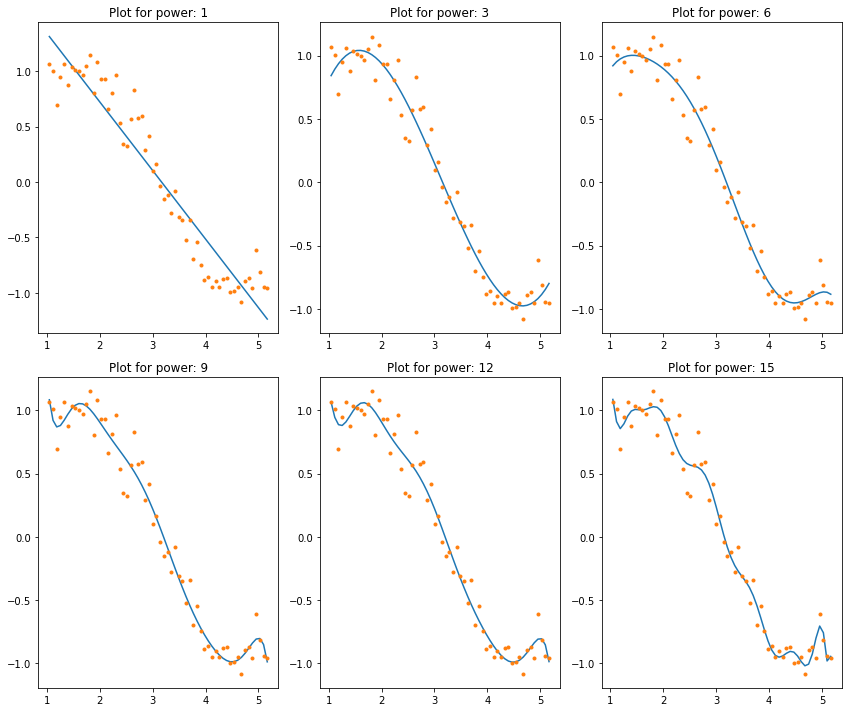

In [ ]:
#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. Large coefficient signifies that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

## **2. Ridge Regression**

Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:


```
# Objective = RSS + λ * (sum of square of coefficients)
```
Here, λ (Lambda) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. λ can take various values:

1. λ = 0:
* The objective becomes same as simple linear regression.
* We’ll get the same coefficients as simple linear regression.
2. λ = ∞:
* The coefficients will be zero. Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
3. 0 < λ < ∞:
* The magnitude of λ will decide the weightage given to different parts of objective.
* The coefficients will be somewhere between 0 and ones for simple linear regression


In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for lambda: %.3g'%alpha)

    # Metrics
    print('For lambda: %0.3g'%alpha)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

For lambda: 1e-15
MAE: 0.0943231766662303
MSE: 0.014551612837375346
RMSE: 0.12063006605890318
R2 Score: 0.9757974522371746
------------------
For lambda: 1e-10
MAE: 0.09355165205996002
MSE: 0.015376690360493016
RMSE: 0.12400278368041992
R2 Score: 0.9743750556989506
------------------
For lambda: 1e-08
MAE: 0.09466004878734288
MSE: 0.01582153542770128
RMSE: 0.12578368506170137
R2 Score: 0.9736286107055528
------------------
For lambda: 0.0001
MAE: 0.09577304985748995
MSE: 0.016033640773604477
RMSE: 0.126624013416115
R2 Score: 0.9732297147901923
------------------
For lambda: 0.001
MAE: 0.09997212051568277
MSE: 0.016696263341429925
RMSE: 0.12921402145831515
R2 Score: 0.9718743337848443
------------------
For lambda: 0.01
MAE: 0.12383201791861807
MSE: 0.02392980327677335
RMSE: 0.15469260899206966
R2 Score: 0.9587549940765918
------------------
For lambda: 1
MAE: 0.27020808540069413
MSE: 0.09414573359486839
RMSE: 0.3068317675777206
R2 Score: 0.7322840891666197
------------------
For lambda

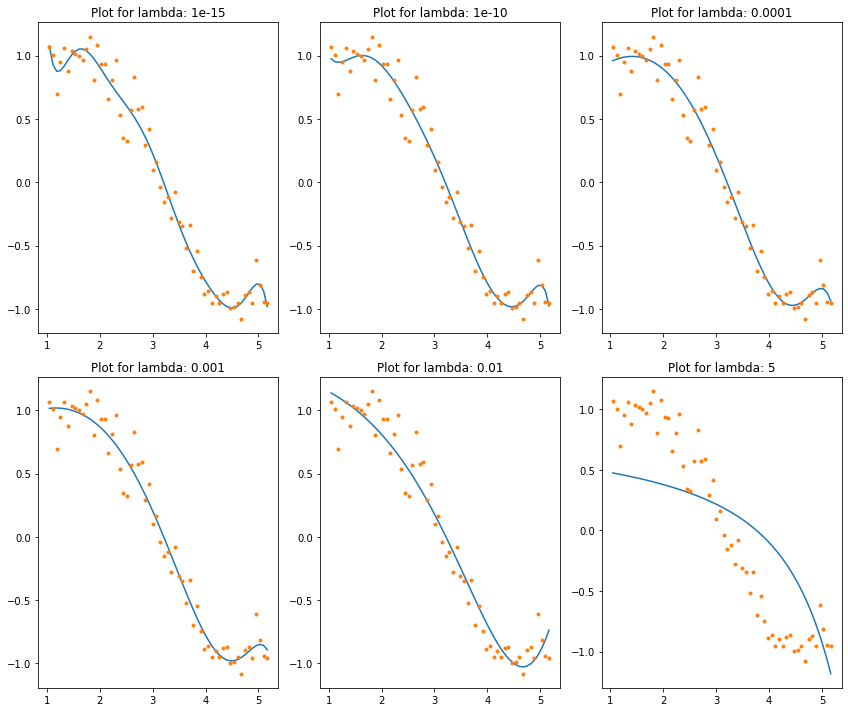

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['lambda_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,0.87,95,-3e+02,3.8e+02,-2.3e+02,63,2.1,-5,0.6,0.17,-0.031,-0.0051,0.00085,0.00024,-6.1e-05,4.5e-06,-9.3e-08
lambda_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
lambda_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
lambda_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
lambda_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
lambda_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
lambda_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
lambda_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
lambda_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
lambda_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


Inferences : 


*   The RSS increases with increase in lambda, this model complexity reduces
*   Lambda as small as 1e-15 gives us significant reduction in magnitude of coefficients.
*  High lambda values can lead to significant underfitting.




## **3. Lasso Regresssion**

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following: 



```
# Objective = RSS + λ * (sum of absolute value of coefficients)
```

Like that of ridge, α can take various values. Lets iterate it here briefly:

* λ = 0: Same coefficients as simple linear regression
* λ = ∞: All coefficients zero (same logic as before)
* 0 < λ < ∞: coefficients between 0 and that of simple linear regression


In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for lambda: %.3g'%alpha)

    # Metrics
    print('For lambda: %0.3g'%alpha)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

For lambda: 1e-15
MAE: 0.09509668216025217
MSE: 0.015945246111515262
RMSE: 0.12627448717581577
R2 Score: 0.9734157844164396
------------------
For lambda: 1e-10
MAE: 0.09509668010033114
MSE: 0.01594524490789885
RMSE: 0.12627448240994238
R2 Score: 0.9734157863008956
------------------
For lambda: 1e-08
MAE: 0.09509652152840226
MSE: 0.015945132233486533
RMSE: 0.12627403626037512
R2 Score: 0.9734159616387766
------------------
For lambda: 1e-05
MAE: 0.09598445887423229
MSE: 0.016021602228886933
RMSE: 0.12657646791124696
R2 Score: 0.973248548291097
------------------
For lambda: 0.0001
MAE: 0.10254318335706021
MSE: 0.01721046664913304
RMSE: 0.13118866814299565
R2 Score: 0.9709449253044085
------------------
For lambda: 0.001
MAE: 0.1340108833703543
MSE: 0.027980547344337237
RMSE: 0.1672738692812994
R2 Score: 0.950770584398487
------------------
For lambda: 0.01
MAE: 0.2056958300827416
MSE: 0.060651189745176
RMSE: 0.24627462261706137
R2 Score: 0.8655681293630924
------------------
For lambd

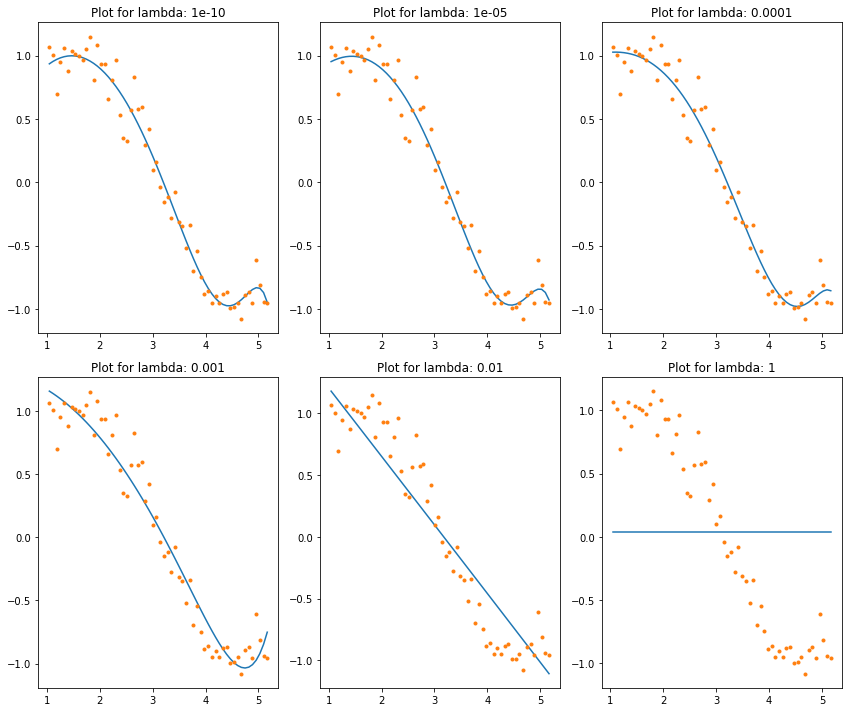

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['lambda_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
lambda_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
lambda_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
lambda_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
lambda_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
lambda_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
lambda_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
lambda_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


Inferences:


*   For the same values of lambda, the coefficients of lasso regression are much smaller as compared to that of ridge regression.
*   For the same lambda, lasso has higher RSS (poorer fit) as compared to ridge regression
*   Many of the coefficients are zero even for very small values of lambda


## **4. Elastic Net Regularization**

Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.

```
# Objective = RSS + λ * (sum of absolute value of coefficients) + λ *((sum of square of coefficients)
```
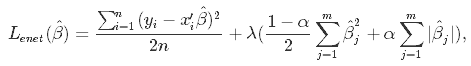

where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).

In [ ]:
from sklearn.linear_model import ElasticNet
def ElasticNet_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    elasticreg = ElasticNet(alpha=alpha,normalize=True, max_iter=1e5)
    elasticreg.fit(data[predictors],data['y'])
    y_pred = elasticreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for lambda: %.3g'%alpha)
    
    # Metrics
    print('For lambda: %0.3g'%alpha)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([elasticreg.intercept_])
    ret.extend(elasticreg.coef_)
    return ret

For lambda: 1e-15
MAE: 0.09509668216071643
MSE: 0.01594524611156026
RMSE: 0.12627448717599396
R2 Score: 0.9734157844163507
------------------
For lambda: 1e-10
MAE: 0.0950967264848833
MSE: 0.015945249419204815
RMSE: 0.12627450027303538
R2 Score: 0.9734157773706216
------------------
For lambda: 1e-08
MAE: 0.09510116890572626
MSE: 0.015945586290559064
RMSE: 0.12627583415111168
R2 Score: 0.973415058065594
------------------
For lambda: 1e-05
MAE: 0.09693627800386943
MSE: 0.01616107886704484
RMSE: 0.1271262320178052
R2 Score: 0.9729302231866116
------------------
For lambda: 0.0001
MAE: 0.11305480471728481
MSE: 0.02027514907770106
RMSE: 0.14239083214062997
R2 Score: 0.9654009993882438
------------------
For lambda: 0.001
MAE: 0.14019427226044454
MSE: 0.03017610929407573
RMSE: 0.17371272058797457
R2 Score: 0.945962501156863
------------------
For lambda: 0.01
MAE: 0.2308918607792311
MSE: 0.0709578328082757
RMSE: 0.2663791148124712
R2 Score: 0.826354901671335
------------------
For lambda: 

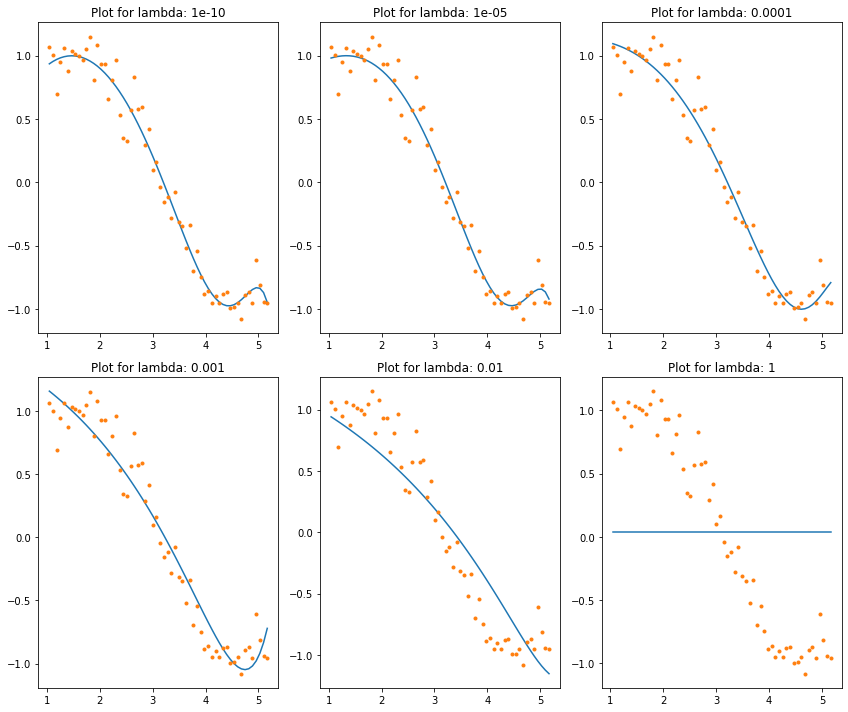

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_elasticnet = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['lambda_%.2g'%alpha_elasticnet[i] for i in range(0,10)]
coef_matrix_elasticnet = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_elasticnet.iloc[i,] = ElasticNet_regression(data, predictors, alpha_elasticnet[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_elasticnet

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
lambda_1e-10,0.96,0.22,1.1,-0.37,0.00087,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
lambda_1e-08,0.96,0.23,1.1,-0.36,-0.00035,0.0016,-0.0001,-6.3e-05,-6.2e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,1.9e-10,-1.9e-10,-9.2e-11
lambda_1e-05,0.97,0.67,0.44,-0.1,-0.025,-0.003,-9.4e-05,1.5e-05,1.4e-05,4e-06,8.1e-07,1.4e-07,1.7e-08,7.2e-10,-0,-1.3e-10,-6.1e-11
lambda_0.0001,1.2,1.1,0.06,-0.063,-0.015,-0.002,-7.8e-05,0,6.4e-06,2.2e-06,5e-07,8.6e-08,1.1e-08,3.7e-10,-0,-4.2e-11,-3e-11
lambda_0.001,1.8,1.4,-0.22,-0.042,-0.0064,-0.00069,-1.2e-05,-0,0,0,5.9e-08,2e-08,4.5e-09,8.6e-10,1.4e-10,1.7e-11,1e-12
lambda_0.01,4.3,1.2,-0.21,-0.027,-0.0035,-0.00035,-5.4e-06,-0,-0,0,0,0,0,0,7.1e-12,7.8e-12,2.6e-12
lambda_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


Inferences:

* Increament in value of lambda underfits the data
* For the same lambda, lasso has higher RSS (poorer fit) as compared to ridge regression, and ElastciNet regression
*  Many of the coefficients are zero even for very small values of lambda

## **5. Ridge Complexity / RidgeCV**

RidgeCV implements ridge regression with built-in cross-validation of alpha parameter. It almost works in same way excepts it defaults to Leave-One-Out cross validation.



In [ ]:
from sklearn.linear_model import RidgeCV
def ridgecv_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgecvreg = RidgeCV(alphas=alpha,normalize=True)
    ridgecvreg.fit(data[predictors],data['y'])
    y_pred = ridgecvreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for lambda: %.3g'%alpha)

    # Metrics
    print('For lambda: %0.3g'%alpha)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgecvreg.intercept_])
    ret.extend(ridgecvreg.coef_)
    return ret

For lambda: 1e-15
MAE: 5.07438915182318
MSE: 43.624358999550076
RMSE: 6.604873882183526
R2 Score: -0.2090174089285508
------------------
For lambda: 1e-10
MAE: 0.09354947841598242
MSE: 0.015376697065358439
RMSE: 0.12400281071555773
R2 Score: 0.9743707980291795
------------------
For lambda: 1e-08
MAE: 0.09466004098332204
MSE: 0.015821535428201625
RMSE: 0.12578368506369028
R2 Score: 0.9736285749808552
------------------
For lambda: 0.0001
MAE: 0.09577304986495166
MSE: 0.016033640773605525
RMSE: 0.12662401341611917
R2 Score: 0.9732297147866563
------------------
For lambda: 0.001
MAE: 0.09997212051640186
MSE: 0.0166962633414311
RMSE: 0.1292140214583197
R2 Score: 0.971874333784405
------------------
For lambda: 0.01
MAE: 0.12383201791861158
MSE: 0.023929803276774544
RMSE: 0.15469260899207352
R2 Score: 0.958754994076521
------------------
For lambda: 1
MAE: 0.27020808540069424
MSE: 0.09414573359486902
RMSE: 0.3068317675777217
R2 Score: 0.7322840891666125
------------------
For lambda: 5
MA

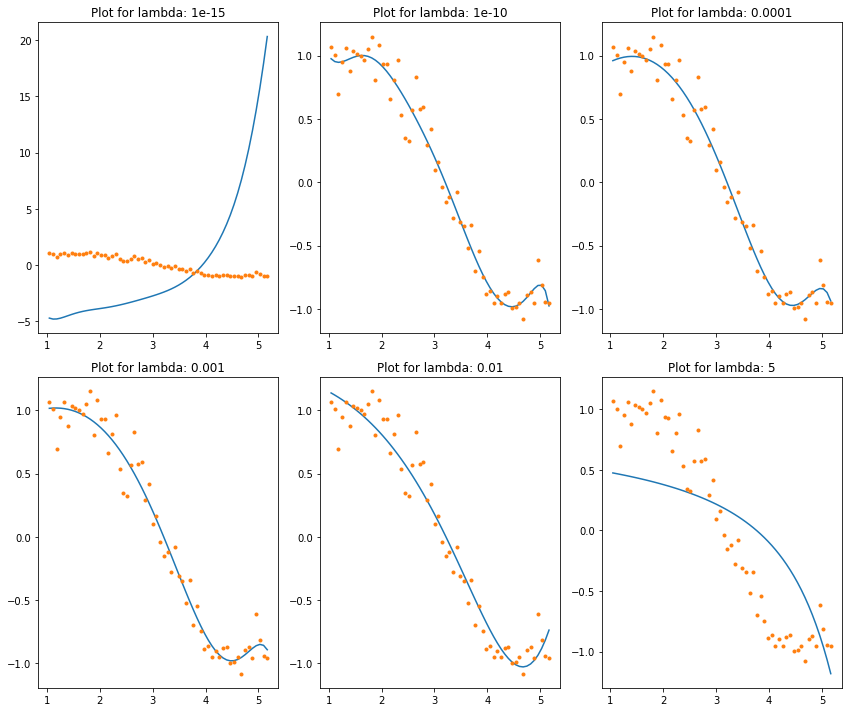

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridgecv = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['lambda_%.2g'%alpha_ridgecv[i] for i in range(0,10)]
coef_matrix_ridgecv = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridgecv.iloc[i,] = ridgecv_regression(data, predictors, alpha_ridgecv[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridgecv

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,2.6e+03,88,-3e+02,3.8e+02,-2.3e+02,65,0.87,-4.6,0.56,0.16,-0.026,-0.0059,0.00098,0.00019,-5e-05,3.3e-06,-4.5e-08
lambda_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
lambda_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
lambda_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
lambda_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
lambda_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
lambda_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
lambda_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
lambda_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
lambda_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


Inferences:
* For very small lambda / alpha, model is underfitting 
* For lambda or alpha > 5, it is also underfitting

## **6. Lasso Least Angle Regression (LassoLARS)**

Least-angle regression (LARS) is a regression algorithm for high-dimensional data. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

In [ ]:
from sklearn.linear_model import LassoLars
def lassolars_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassolarsreg = LassoLars(alpha=alpha,normalize=True)
    lassolarsreg.fit(data[predictors],data['y'])
    y_pred = lassolarsreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for lambda: %.3g'%alpha)

    # Metrics
    print('For lambda: %0.3g'%alpha)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassolarsreg.intercept_])
    ret.extend(lassolarsreg.coef_)
    return ret

For lambda: 1e-15
MAE: 0.09493392633753
MSE: 0.015863706258711936
RMSE: 0.1259512058644614
R2 Score: 0.9735562761487878
------------------
For lambda: 1e-10
MAE: 0.09493392633753
MSE: 0.015863706258711936
RMSE: 0.1259512058644614
R2 Score: 0.9735562761487878
------------------
For lambda: 1e-08
MAE: 0.09493392633753
MSE: 0.015863706258711936
RMSE: 0.1259512058644614
R2 Score: 0.9735562761487878
------------------
For lambda: 0.0001
MAE: 0.10257627389584664
MSE: 0.017251423299332377
RMSE: 0.1313446736618291
R2 Score: 0.9708744085086503
------------------
For lambda: 0.001
MAE: 0.13360060536576984
MSE: 0.027889392695240267
RMSE: 0.16700117573011355
R2 Score: 0.9509323827679934
------------------
For lambda: 0.01
MAE: 0.20572186168950832
MSE: 0.06065600677762002
RMSE: 0.2462844022215374
R2 Score: 0.8655322344915916
------------------
For lambda: 1
MAE: 0.7220068007283874
MSE: 0.6158006403640681
RMSE: 0.7847296606883597
R2 Score: 0.0
------------------
For lambda: 5
MAE: 0.7220068007283874

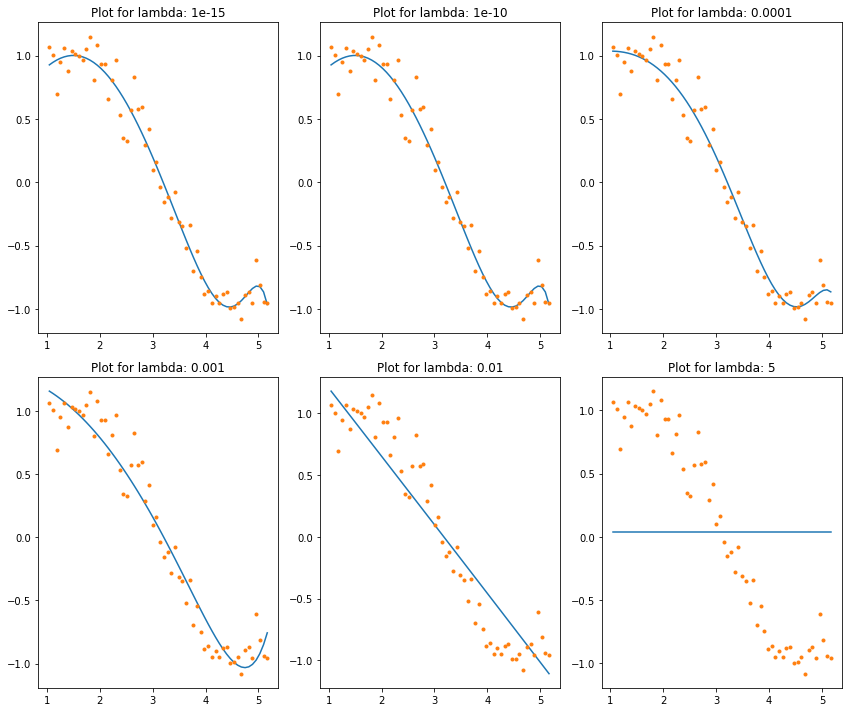

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_lassolars = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['lambda_%.2g'%alpha_lassolars[i] for i in range(0,10)]
coef_matrix_lassolars = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_lassolars.iloc[i,] = lassolars_regression(data, predictors, alpha_lassolars[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lassolars

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,0.95,0.36,0.67,0,-0.11,0,0.0041,0,0,0,-5.4e-06,0,0,0,1.7e-08,0,-4.5e-10
lambda_1e-10,0.95,0.36,0.67,0,-0.11,0,0.0041,0,0,0,-5.4e-06,0,0,0,1.7e-08,0,-4.5e-10
lambda_1e-08,0.95,0.36,0.67,0,-0.11,0,0.0041,0,0,0,-5.4e-06,0,0,0,1.7e-08,0,-4.5e-10
lambda_0.0001,1,0.95,0.13,0,-0.044,0,0,0,0,0,2.4e-06,0,0,0,0,0,-5.7e-11
lambda_0.001,1.7,1.3,0,-0.13,0,0,0,0,0,0,0,0,1.9e-08,0,0,0,0
lambda_0.01,3.6,1.8,-0.55,-0.00084,0,0,0,0,0,0,0,0,0,0,0,0,0
lambda_1,37,0.038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lambda_5,37,0.038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lambda_10,37,0.038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lambda_20,37,0.038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Inferences:

* As value of lambda(alpha) increases, model is underfitting i.e., bias is increasing

## **7. Hubber Regressor**

The HuberRegressor is different to Ridge because it applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold.

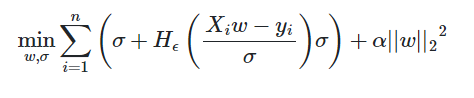

In [ ]:
from sklearn.linear_model import HuberRegressor
def h_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    hreg = HuberRegressor(alpha=alpha)
    hreg.fit(data[predictors],data['y'])
    y_pred = hreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    # Metrics
    print('For lambda: %0.3g'%alpha)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([hreg.intercept_])
    ret.extend(hreg.coef_)
    return ret

For lambda: 1e-15
MAE: 0.4312552915414952
MSE: 0.3431461023812063
RMSE: 0.5857867379697208
R2 Score: -1.1517937757820165
------------------
For lambda: 1e-10
MAE: 0.4312552915414952
MSE: 0.3431461023812063
RMSE: 0.5857867379697208
R2 Score: -1.1517937757820165
------------------
For lambda: 1e-08
MAE: 0.4312552915414952
MSE: 0.3431461023812063
RMSE: 0.5857867379697208
R2 Score: -1.1517937757820165
------------------
For lambda: 0.0001
MAE: 0.4312552915414963
MSE: 0.3431461023812063
RMSE: 0.5857867379697208
R2 Score: -1.151793775782028
------------------
For lambda: 0.001
MAE: 0.4312552915409921
MSE: 0.34314610238120663
RMSE: 0.585786737969721
R2 Score: -1.1517937757744892
------------------
For lambda: 0.01
MAE: 0.4312552915400738
MSE: 0.3431461023812067
RMSE: 0.5857867379697211
R2 Score: -1.1517937757723908
------------------
For lambda: 1
MAE: 0.4312552915409252
MSE: 0.34314610238120635
RMSE: 0.5857867379697208
R2 Score: -1.151793775805349
------------------
For lambda: 5
MAE: 0.4312

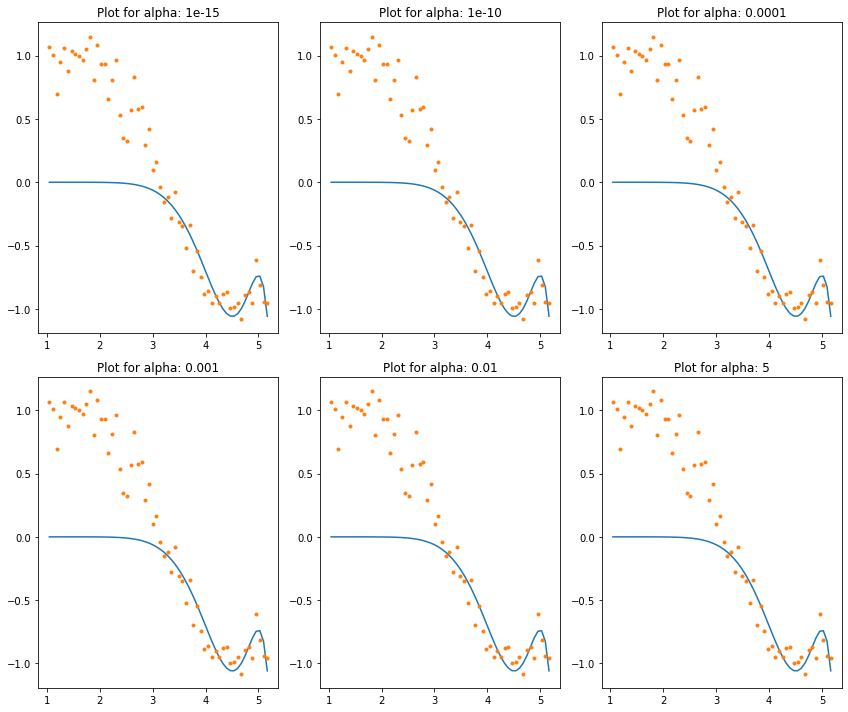

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_h = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['lambda_%.2g'%alpha_h[i] for i in range(0,10)]
coef_matrix_h = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_h.iloc[i,] = h_regression(data, predictors, alpha_h[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_h

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_1e-10,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_1e-08,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_0.0001,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_0.001,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_0.01,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_1,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_5,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_10,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09
lambda_20,21,2e-13,2.7e-13,1.6e-13,-9.3e-13,-6.4e-12,-3e-11,-1.2e-10,-4.4e-10,-1.6e-09,-5.2e-09,-1.6e-08,-4.4e-08,-9.8e-08,-1.4e-07,6.7e-08,-7e-09


For almost every lambda/alpha, it is showing same fit line


## **8. SGD Regression**

Linear model fitted by minimizing a regularized empirical loss with SGD.

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

In [ ]:
from sklearn.linear_model import SGDRegressor
def sgd_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    sgdreg = SGDRegressor(alpha=alpha)
    sgdreg.fit(data[predictors],data['y'])
    y_pred = sgdreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for lambda: %.3g'%alpha)

    # Metrics
    print('For lambda: %0.3g'%alpha)
    print('MAE:', metrics.mean_absolute_error(y_pred, data['y']))
    print('MSE:', metrics.mean_squared_error(y_pred, data['y']))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, data['y'])))
    print('R2 Score:' ,metrics.r2_score(y_pred,data['y']))
    print('------------------')
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([sgdreg.intercept_])
    ret.extend(sgdreg.coef_)
    return ret

For lambda: 0.01
MAE: 1.8541073301138378e+29
MSE: 2.2731288964644563e+59
RMSE: 4.767734154149596e+29
R2 Score: -0.17817921232231626
------------------
For lambda: 0.02
MAE: 2.212584900259559e+29
MSE: 3.235902083537524e+59
RMSE: 5.6884989966928215e+29
R2 Score: -0.1782560096300687
------------------
For lambda: 0.03
MAE: 1.3241334175398608e+29
MSE: 1.1557226834529244e+59
RMSE: 3.399592157087265e+29
R2 Score: -0.17884002791769138
------------------
For lambda: 0.05
MAE: 3.1625000197620575e+29
MSE: 6.6035347839130895e+59
RMSE: 8.126213622538537e+29
R2 Score: -0.17848836104803278
------------------
For lambda: 0.06
MAE: 5.581298153197557e+28
MSE: 2.0604057918293902e+58
RMSE: 1.4354113667619433e+29
R2 Score: -0.1781173553206048
------------------
For lambda: 0.09
MAE: 1.4314073023171948e+28
MSE: 1.3135921285667223e+57
RMSE: 3.6243511537470016e+28
R2 Score: -0.18480453650549888
------------------
For lambda: 1
MAE: 1.443446886273881e+29
MSE: 1.3741715718792512e+59
RMSE: 3.706982022992897e+29

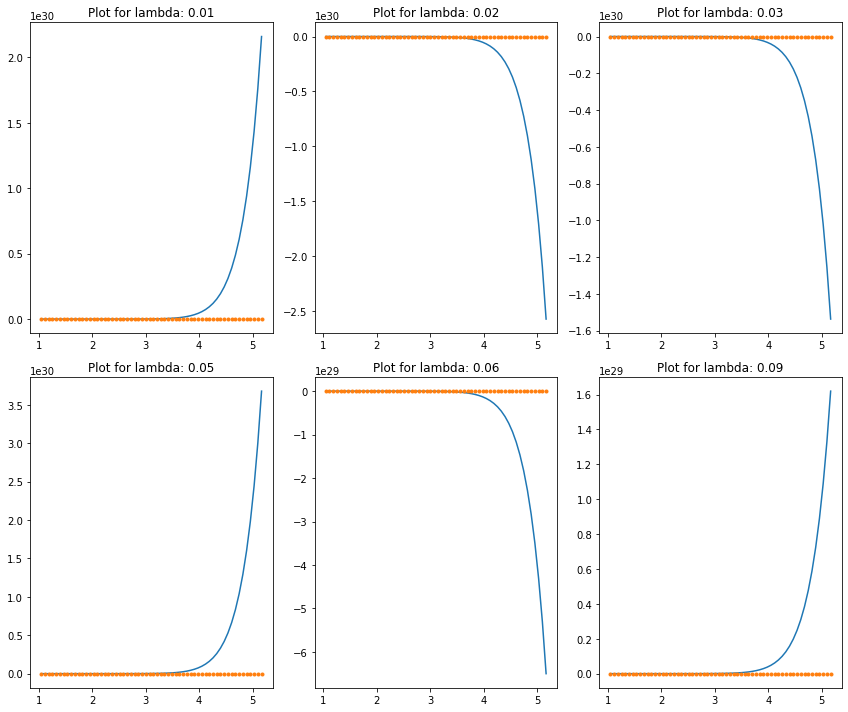

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_sgd = [0.01, 0.02, 0.03, 0.05, 0.06,0.09, 1, 2, 3, 4]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['lambda_%.2g'%alpha_sgd[i] for i in range(0,10)]
coef_matrix_sgd = pd.DataFrame(index=ind, columns=col)

models_to_plot = {0.01:231, 0.02:232, 0.03:233, 0.05:234, 0.06:235, 0.09:236}
for i in range(10):
    coef_matrix_sgd.iloc[i,] = sgd_regression(data, predictors, alpha_sgd[i], models_to_plot)

--------------------------------------------------------------------------------
